In [1]:
"""Dataset A"""

'Dataset A'

In [2]:
import numpy as np 
import pandas as pd 
import os 
import h5py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
from tabulate import tabulate
import pickle

In [3]:
from Q3 import *


In [4]:
X,Y = load_dataset(0)
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(" x_train shape : ", x_train.shape, "\n", "x_val shape : ", x_val.shape,"\n","x_test shape :", x_test.shape)

(4200, 784) (4200, 10)
The class frequencies are : 
The frequency of class 0 is 400.0 / 4200
The frequency of class 1 is 494.0 / 4200
The frequency of class 2 is 393.0 / 4200
The frequency of class 3 is 424.0 / 4200
The frequency of class 4 is 416.0 / 4200
The frequency of class 5 is 398.0 / 4200
The frequency of class 6 is 441.0 / 4200
The frequency of class 7 is 431.0 / 4200
The frequency of class 8 is 410.0 / 4200
The frequency of class 9 is 393.0 / 4200
 x_train shape :  (2520, 784) 
 x_val shape :  (840, 784) 
 x_test shape : (840, 784)


In [4]:
X,Y = load_dataset(0)
std_slc = StandardScaler()

X = std_slc.fit_transform(X)

dec_tree = tree.DecisionTreeClassifier()

max_depth = list([i for i in range(1,30,1)])

parameters = dict( max_depth=max_depth)

clf_GS = MyGridSearchCV(dec_tree, parameters)
clf_GS.fit(X, Y)

(4200, 784) (4200, 10)
The class frequencies are : 
The frequency of class 0 is 400.0 / 4200
The frequency of class 1 is 494.0 / 4200
The frequency of class 2 is 393.0 / 4200
The frequency of class 3 is 424.0 / 4200
The frequency of class 4 is 416.0 / 4200
The frequency of class 5 is 398.0 / 4200
The frequency of class 6 is 441.0 / 4200
The frequency of class 7 is 431.0 / 4200
The frequency of class 8 is 410.0 / 4200
The frequency of class 9 is 393.0 / 4200
Current parameters :  {'max_depth': 1}
Best validation score achieved :  0.21666666666666667  Average validation score achieved :  0.2045238095238095 

Current parameters :  {'max_depth': 2}
Best validation score achieved :  0.36428571428571427  Average validation score achieved :  0.3280952380952381 

Current parameters :  {'max_depth': 3}
Best validation score achieved :  0.49047619047619045  Average validation score achieved :  0.42428571428571427 

Current parameters :  {'max_depth': 4}
Best validation score achieved :  0.590476

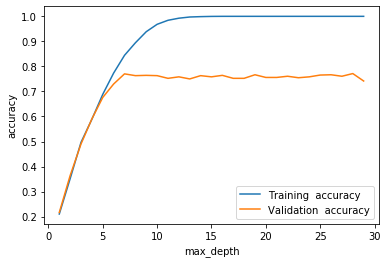

In [5]:
import matplotlib.pyplot as plt 
plt.plot([x for x in range(1,30,1)], clf_GS.training_accuracy_history, label = "Training  accuracy " )
plt.plot([x for x in range(1,30,1)], clf_GS.validation_accuracy_history, label = "Validation  accuracy")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [3]:
def kFoldCrossValidation(X, y, model):
    """ Performs K fold cross validation of the model and the dataset provided, and returns the best model with the fold

    Parameters 
    -----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as data
    Y : 1-dimensional numpy array of shape (n_samples,) which acts as labels.
    k : number of folds, default = 5.

    Returns
    --------
    optimal_model : best model determined.
    fold : dictionary that contains the best fold.
    """
    k = 5
    m = X.shape[0]  #number of examples
    fold_size = int(m/k)
    start = 0
    end = fold_size
    models = {}
    folds = {}
    for i in range(k):
        Xtrain_i = np.concatenate((X[0:start], X[end+1:]))
        ytrain_i = np.concatenate((y[0:start],y[end+1:]))
        X_test =  X[start:end]
        y_test = y[start:end]
        folds[i] = (start,end+1,Xtrain_i,ytrain_i,X_test,y_test)
        model = model.fit(Xtrain_i, ytrain_i)
        y_pred = model.predict(X_test)
        train_score = accuracy_score(ytrain_i,model.predict(Xtrain_i))
        test_score = accuracy_score(y_test,y_pred)
        models[i] = (model, train_score, test_score)
        start+=fold_size
        end+=fold_size

    best_model = -1
    best_val_score = 0
    best_train_score = 0
    avg_val_score=0
    for i in range(len(models)):
        avg_val_score+=models[i][2]
        if(best_val_score < models[i][2]):
            best_val_score = models[i][2]
            best_model = i
        if(best_train_score < models[i][1]):
            best_train_score = models[i][1]

    avg_val_score = avg_val_score/k

    return models[best_model][0], avg_val_score, best_val_score, best_train_score

In [23]:
from sklearn.naive_bayes import GaussianNB
X,y = load_dataset(0)
# std_slc = StandardScaler()
# X = std_slc.fit_transform(X)
clf = GaussianNB()
best_model,avg_val,best_val,best_train = kFoldCrossValidation(X,y,clf)
l = [[ best_model,avg_val,best_val,best_train]]
table = tabulate(l, headers=["Best Model", "Average Validation Score", "Best Validation Score", "Best training Score"], tablefmt='orgtbl')
print("\n")
print(table)
# print(best_model,avg_val,best_val,best_train)

(4200, 784) (4200, 10)
The class frequencies are : 
The frequency of class 0 is 400.0 / 4200
The frequency of class 1 is 494.0 / 4200
The frequency of class 2 is 393.0 / 4200
The frequency of class 3 is 424.0 / 4200
The frequency of class 4 is 416.0 / 4200
The frequency of class 5 is 398.0 / 4200
The frequency of class 6 is 441.0 / 4200
The frequency of class 7 is 431.0 / 4200
The frequency of class 8 is 410.0 / 4200
The frequency of class 9 is 393.0 / 4200


| Best Model                                   |   Average Validation Score |   Best Validation Score |   Best training Score |
|----------------------------------------------+----------------------------+-------------------------+-----------------------|
| GaussianNB(priors=None, var_smoothing=1e-09) |                   0.550238 |                0.586905 |              0.607324 |


In [35]:
#best model save
dec_tree = tree.DecisionTreeClassifier(max_depth = 10)
dec_tree.fit(x_train, y_train)
filename = 'models/DT_datasetA.sav'
pickle.dump(dec_tree, open(filename, 'wb'))

In [5]:
loaded_model = pickle.load(open('models/DT_datasetA.sav', 'rb'))
score = loaded_model.score(x_test, y_test)

print(score)

0.7416666666666667


In [6]:
""" Decision Tree metrics """

' Decision Tree metrics '

In [7]:
y_pred = loaded_model.predict(x_test)

In [8]:
metrics = MyEvaluationMetric()
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
accuracy_score = metrics.accuracy_score(y_test,y_pred)
pres_score_micro = metrics.precision_score(y_test,y_pred,average = "micro")
pres_score_macro = metrics.precision_score(y_test,y_pred,average = "macro")
recall_score_micro = metrics.recall_score(y_test,y_pred,average = "micro")
recall_score_macro = metrics.recall_score(y_test,y_pred,average = "macro")
f1_score_micro = metrics.f1_score(y_test,y_pred,average = "micro")
f1_score_macro = metrics.f1_score(y_test,y_pred,average = "macro")
print("Confusion matrix \n", confusion_matrix)

Confusion matrix 
 [[75  0  0  1  0  5  2  2  1  2]
 [ 0 82  1  2  2  1  0  1  2  0]
 [ 0  0 56  5  8  1  5  2  4  1]
 [ 2  2  4 64  0  1  1  1  3  3]
 [ 1  0  0  1 69  2  6  3  1  8]
 [ 0  1  3  7  3 47  3  3  1  2]
 [ 2  0  4  1  2  7 64  2  5  4]
 [ 1  2  0  0  0  0  0 64  2  6]
 [ 4  6  6 11  1  2  2  0 49  6]
 [ 0  2  4  1  7  4  2  7  4 53]]


In [9]:
l = [[accuracy_score,pres_score_micro,pres_score_macro,recall_score_micro,recall_score_macro,f1_score_micro,f1_score_macro]]
table = tabulate(l, headers=["Accuracy","Micro Precision ", "Macro precision ", "Micro Recall ", "Macro Recall ", "Micro f1 ","Macro f1 "], tablefmt='orgtbl')
print("\n")
print(table)



|   Accuracy |   Micro Precision  |   Macro precision  |   Micro Recall  |   Macro Recall  |   Micro f1  |   Macro f1  |
|------------+--------------------+--------------------+-----------------+-----------------+-------------+-------------|
|   0.741667 |           0.741667 |           0.738303 |        0.741667 |        0.740689 |    0.741667 |    0.739494 |


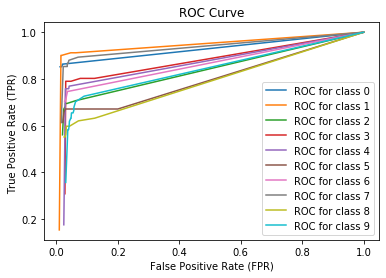

In [10]:
prob = loaded_model.predict_proba(x_test)
metrics.plot_roc_curve(y_test, prob)

In [11]:
"""Gaussian Naive Bayes metrics """

'Gaussian Naive Bayes metrics '

In [12]:
X,Y = load_dataset(0)
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(" x_train shape : ", x_train.shape, "\n", "x_val shape : ", x_val.shape,"\n","x_test shape :", x_test.shape)

(4200, 784) (4200, 10)
The class frequencies are : 
The frequency of class 0 is 400.0 / 4200
The frequency of class 1 is 494.0 / 4200
The frequency of class 2 is 393.0 / 4200
The frequency of class 3 is 424.0 / 4200
The frequency of class 4 is 416.0 / 4200
The frequency of class 5 is 398.0 / 4200
The frequency of class 6 is 441.0 / 4200
The frequency of class 7 is 431.0 / 4200
The frequency of class 8 is 410.0 / 4200
The frequency of class 9 is 393.0 / 4200
 x_train shape :  (2520, 784) 
 x_val shape :  (840, 784) 
 x_test shape : (840, 784)


In [13]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [14]:
metrics = MyEvaluationMetric()
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
accuracy_score = metrics.accuracy_score(y_test,y_pred)
pres_score_micro = metrics.precision_score(y_test,y_pred,average = "micro")
pres_score_macro = metrics.precision_score(y_test,y_pred,average = "macro")
recall_score_micro = metrics.recall_score(y_test,y_pred,average = "micro")
recall_score_macro = metrics.recall_score(y_test,y_pred,average = "macro")
f1_score_micro = metrics.f1_score(y_test,y_pred,average = "micro")
f1_score_macro = metrics.f1_score(y_test,y_pred,average = "macro")
print("Confusion matrix \n", confusion_matrix)

Confusion matrix 
 [[77  0  1  0  1  1  4  0  1  3]
 [ 2 84  0  1  0  0  1  0  0  3]
 [18  3 19  8  0  4 17  0 12  1]
 [10  6  4 40  0  0  6  0  4 11]
 [ 2  1  2  0 29  3  6  5  3 40]
 [14  1  1  5  1 12  2  1 21 12]
 [ 0  2  1  0  0  1 86  0  1  0]
 [ 1  0  0  2  2  0  0 30  0 40]
 [ 5 16  1  1  0  0  2  0 44 18]
 [ 1  1  2  0  3  0  0  4  1 72]]


In [15]:
l = [[accuracy_score,pres_score_micro,pres_score_macro,recall_score_micro,recall_score_macro,f1_score_micro,f1_score_macro]]
table = tabulate(l, headers=["Accuracy","Micro Precision ", "Macro precision ", "Micro Recall ", "Macro Recall ", "Micro f1 ","Macro f1 "], tablefmt='orgtbl')
print("\n")
print(table)



|   Accuracy |   Micro Precision  |   Macro precision  |   Micro Recall  |   Macro Recall  |   Micro f1  |   Macro f1  |
|------------+--------------------+--------------------+-----------------+-----------------+-------------+-------------|
|   0.586905 |           0.586905 |           0.633009 |        0.586905 |        0.572167 |    0.586905 |    0.601052 |


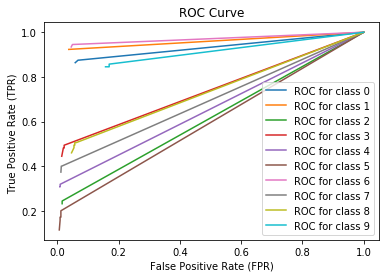

In [16]:
prob = clf.predict_proba(x_test)
metrics.plot_roc_curve(y_test, prob)

In [17]:
""" Dataset B"""

' Dataset B'

In [18]:
X,Y = load_dataset(1)
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(" x_train shape : ", x_train.shape, "\n", "x_val shape : ", x_val.shape,"\n","x_test shape :", x_test.shape)

(4200, 2048) (4200, 2)
The class frequencies are : 
The frequency of class 0 is 2097 / 4200
The frequency of class 1 is 2103 / 4200
 x_train shape :  (2520, 2048) 
 x_val shape :  (840, 2048) 
 x_test shape : (840, 2048)


In [13]:
X,Y = load_dataset(1)
std_slc = StandardScaler()

X = std_slc.fit_transform(X)

dec_tree = tree.DecisionTreeClassifier()

max_depth = list([i for i in range(1,30,1)])

parameters = dict( max_depth=max_depth)

clf_GS = MyGridSearchCV(dec_tree, parameters)
clf_GS.fit(X, Y)

(4200, 2048) (4200, 2)
The class frequencies are : 
The frequency of class 0 is 2097 / 4200
The frequency of class 1 is 2103 / 4200
Current parameters :  {'max_depth': 1}
Best validation score achieved :  0.569047619047619  Average validation score achieved :  0.5583333333333333 

Current parameters :  {'max_depth': 2}
Best validation score achieved :  0.5928571428571429  Average validation score achieved :  0.5714285714285714 

Current parameters :  {'max_depth': 3}
Best validation score achieved :  0.6083333333333333  Average validation score achieved :  0.574047619047619 

Current parameters :  {'max_depth': 4}
Best validation score achieved :  0.5964285714285714  Average validation score achieved :  0.5802380952380952 

Current parameters :  {'max_depth': 5}
Best validation score achieved :  0.6  Average validation score achieved :  0.5819047619047619 

Current parameters :  {'max_depth': 6}
Best validation score achieved :  0.6047619047619047  Average validation score achieved :  

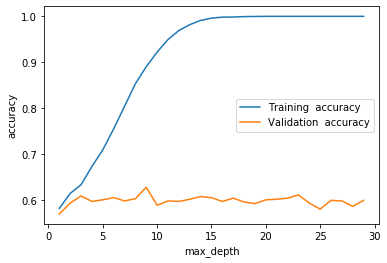

In [15]:
import matplotlib.pyplot as plt 
plt.plot([x for x in range(1,30,1)], clf_GS.training_accuracy_history, label = "Training  accuracy " )
plt.plot([x for x in range(1,30,1)], clf_GS.validation_accuracy_history, label = "Validation  accuracy")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [5]:
from sklearn.naive_bayes import GaussianNB
X,y = load_dataset(1)
# std_slc = StandardScaler()
# X = std_slc.fit_transform(X)
clf = GaussianNB()
best_model,avg_val,best_val,best_train = kFoldCrossValidation(X,y,clf)
l = [[ best_model,avg_val,best_val,best_train]]
table = tabulate(l, headers=["Best Model", "Average Validation Score", "Best Validation Score", "Best training Score"], tablefmt='orgtbl')
print("\n")
print(table)
# print(best_model,avg_val,best_val,best_train)

(4200, 2048) (4200, 2)
The class frequencies are : 
The frequency of class 0 is 2097 / 4200
The frequency of class 1 is 2103 / 4200


| Best Model                                   |   Average Validation Score |   Best Validation Score |   Best training Score |
|----------------------------------------------+----------------------------+-------------------------+-----------------------|
| GaussianNB(priors=None, var_smoothing=1e-09) |                   0.571905 |                0.586905 |               0.57619 |


In [8]:
#best model save
dec_tree = tree.DecisionTreeClassifier(max_depth = 6)
dec_tree.fit(x_train, y_train)
filename = 'models/DT_datasetB.sav'
pickle.dump(dec_tree, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open('models/DT_datasetB.sav', 'rb'))
score = loaded_model.score(x_test, y_test)

print(score)

0.5904761904761905


In [20]:
"""Decision Tree Classifier"""

'Decision Tree Classifier'

In [21]:
y_pred = loaded_model.predict(x_test)

In [22]:
metrics = MyEvaluationMetric()
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
accuracy_score = metrics.accuracy_score(y_test,y_pred)
pres_score= metrics.precision_score(y_test,y_pred)
recall_score= metrics.recall_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
print("Confusion matrix \n", confusion_matrix)

Confusion matrix 
 [[335  93]
 [251 161]]


In [23]:
l = [[accuracy_score,pres_score,recall_score,f1_score]]
table = tabulate(l, headers=["Accuracy Score"," Precision Score", "Recall Score", "f1 Score"], tablefmt='orgtbl')
print("\n")
print(table)



|   Accuracy Score |    Precision Score |   Recall Score |   f1 Score |
|------------------+--------------------+----------------+------------|
|         0.590476 |           0.571672 |        0.78271 |    0.66075 |


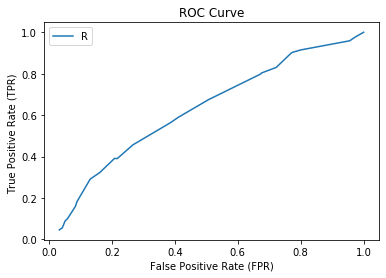

In [24]:
prob = loaded_model.predict_proba(x_test)
metrics.plot_roc_curve(y_test, prob)

In [25]:
"""Gaussian Naive Bayes"""

'Gaussian Naive Bayes'

In [26]:
X,Y = load_dataset(1)
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(" x_train shape : ", x_train.shape, "\n", "x_val shape : ", x_val.shape,"\n","x_test shape :", x_test.shape)

(4200, 2048) (4200, 2)
The class frequencies are : 
The frequency of class 0 is 2097 / 4200
The frequency of class 1 is 2103 / 4200
 x_train shape :  (2520, 2048) 
 x_val shape :  (840, 2048) 
 x_test shape : (840, 2048)


In [27]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [28]:
metrics = MyEvaluationMetric()
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
accuracy_score = metrics.accuracy_score(y_test,y_pred)
pres_score= metrics.precision_score(y_test,y_pred)
recall_score= metrics.recall_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
print("Confusion matrix \n", confusion_matrix)

Confusion matrix 
 [[288 140]
 [222 190]]


In [29]:
l = [[accuracy_score,pres_score,recall_score,f1_score]]
table = tabulate(l, headers=["Accuracy Score"," Precision Score", "Recall Score", "f1 Score"], tablefmt='orgtbl')
print("\n")
print(table)



|   Accuracy Score |    Precision Score |   Recall Score |   f1 Score |
|------------------+--------------------+----------------+------------|
|         0.569048 |           0.564706 |       0.672897 |   0.614072 |


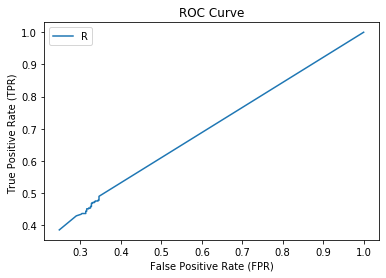

In [30]:
prob = clf.predict_proba(x_test)
metrics.plot_roc_curve(y_test, prob)